# Figures in ReSU NeurIPS 2025

The data used in this notebook is generated from other notebooks. Make sure to run them first. The data is stored in the `result` subfolder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
from matplotlib.gridspec import GridSpec
import pickle

%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.style.use("./nature.mplstyle")

In [2]:
# define some colors
RdBu = sns.color_palette("RdBu", 10)
PrGn = sns.color_palette("PRGn", 10)
platte = sns.color_palette()


## Fig 1 An overview of the ReSU single layer
A summary of the input and the examples

### Fig 1A

In [3]:
# load the natural scene traces
root = "./results/"
dfile1 = root + "fig1_natural_scence_contrast_trace.npy"
dfile2 = root + "fig1_selected_scence.npy"

trace1 = np.load(dfile1)
contrast_sel = np.load(dfile2)

### Fig 1B

In [10]:
# load Gaussian process data
ou_data = root + "ou_functions.npy"
rq_gauss_data = root + "rq_functions.npy"

ou_functions = np.load(ou_data)
rq_functions = np.load(rq_gauss_data)

Alternatively, we can show a more complex OU process example with oscillation

In [11]:
with open('./results/OU_process_oscillation.pkl', 'rb') as f:
    data_cpx_ou = pickle.load(f)
cpx_ou_filters = data_cpx_ou['filter3'][:2,:].T
# change the sign of the first filter
cpx_ou_filters[:,0] = cpx_ou_filters[:,0]*-1
cpx_ou_sv = data_cpx_ou['S3']

cpx_out_trace_all = data_cpx_ou['P'][0,:]
# randomly select a part of the cpx_out_trace_all with length 1000
cpx_ou_trace = cpx_out_trace_all[1000:1200]

# plt.plot(cpx_ou_sv,'o')

In [12]:
# load the average filters and the sv of rational quadratic and o-u data
dfile = root + "cca_rq_ou.npz"
data = np.load(dfile)
ou_mean_filters = data['ou_mean_filters']
rq_mean_filters = data['rq_mean_filters']
sv_ou_mean = data['sv_ou_mean']
sv_rq_mean = data['sv_rq_mean']

In [13]:
# load natural scene filter and singular values
dfile = root + "fig1_natural_scence_filters_sv.npz"
data = np.load(dfile)
natural_scene_filters = data['filters']
sv_natural_scene = data['singular_values']

In [14]:
fields = ['trace','singular_values','filters']
ou = dict(zip(fields, [cpx_ou_trace, cpx_ou_sv, cpx_ou_filters]))

# use a more complex ou example
# ou = dict(zip(fields, [data_cpx_ou[0], data_cpx_ou[1], data_cpx_ou[2]]))
rq = dict(zip(fields, [rq_functions[100], sv_rq_mean, rq_mean_filters.T]))
natural_scene = dict(zip(fields, [contrast_sel, sv_natural_scene[:25], natural_scene_filters.T]))
all_examples = [ou,rq,natural_scene]

The mutual information is defined as
$$
I = -\frac{1}{2} \log(1 - \rho^2)
$$
where $\rho$ is the canonical correlation. The mutual information is a measure of the amount of information that one random variable contains about another random variable. It is a non-negative value, and it is equal to zero if and only if the two random variables are independent.
$$

Make a 3 x 3 plots showing the data, the filters and the singular value/information content

/var/folders/3z/_bb473657q310rc8wnkt9vrr0000gn/T/ipykernel_43841/985746154.py:11: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig1.subplots_adjust(wspace=0.4)
/var/folders/3z/_bb473657q310rc8wnkt9vrr0000gn/T/ipykernel_43841/985746154.py:13: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig1.subplots_adjust(hspace=0.7)


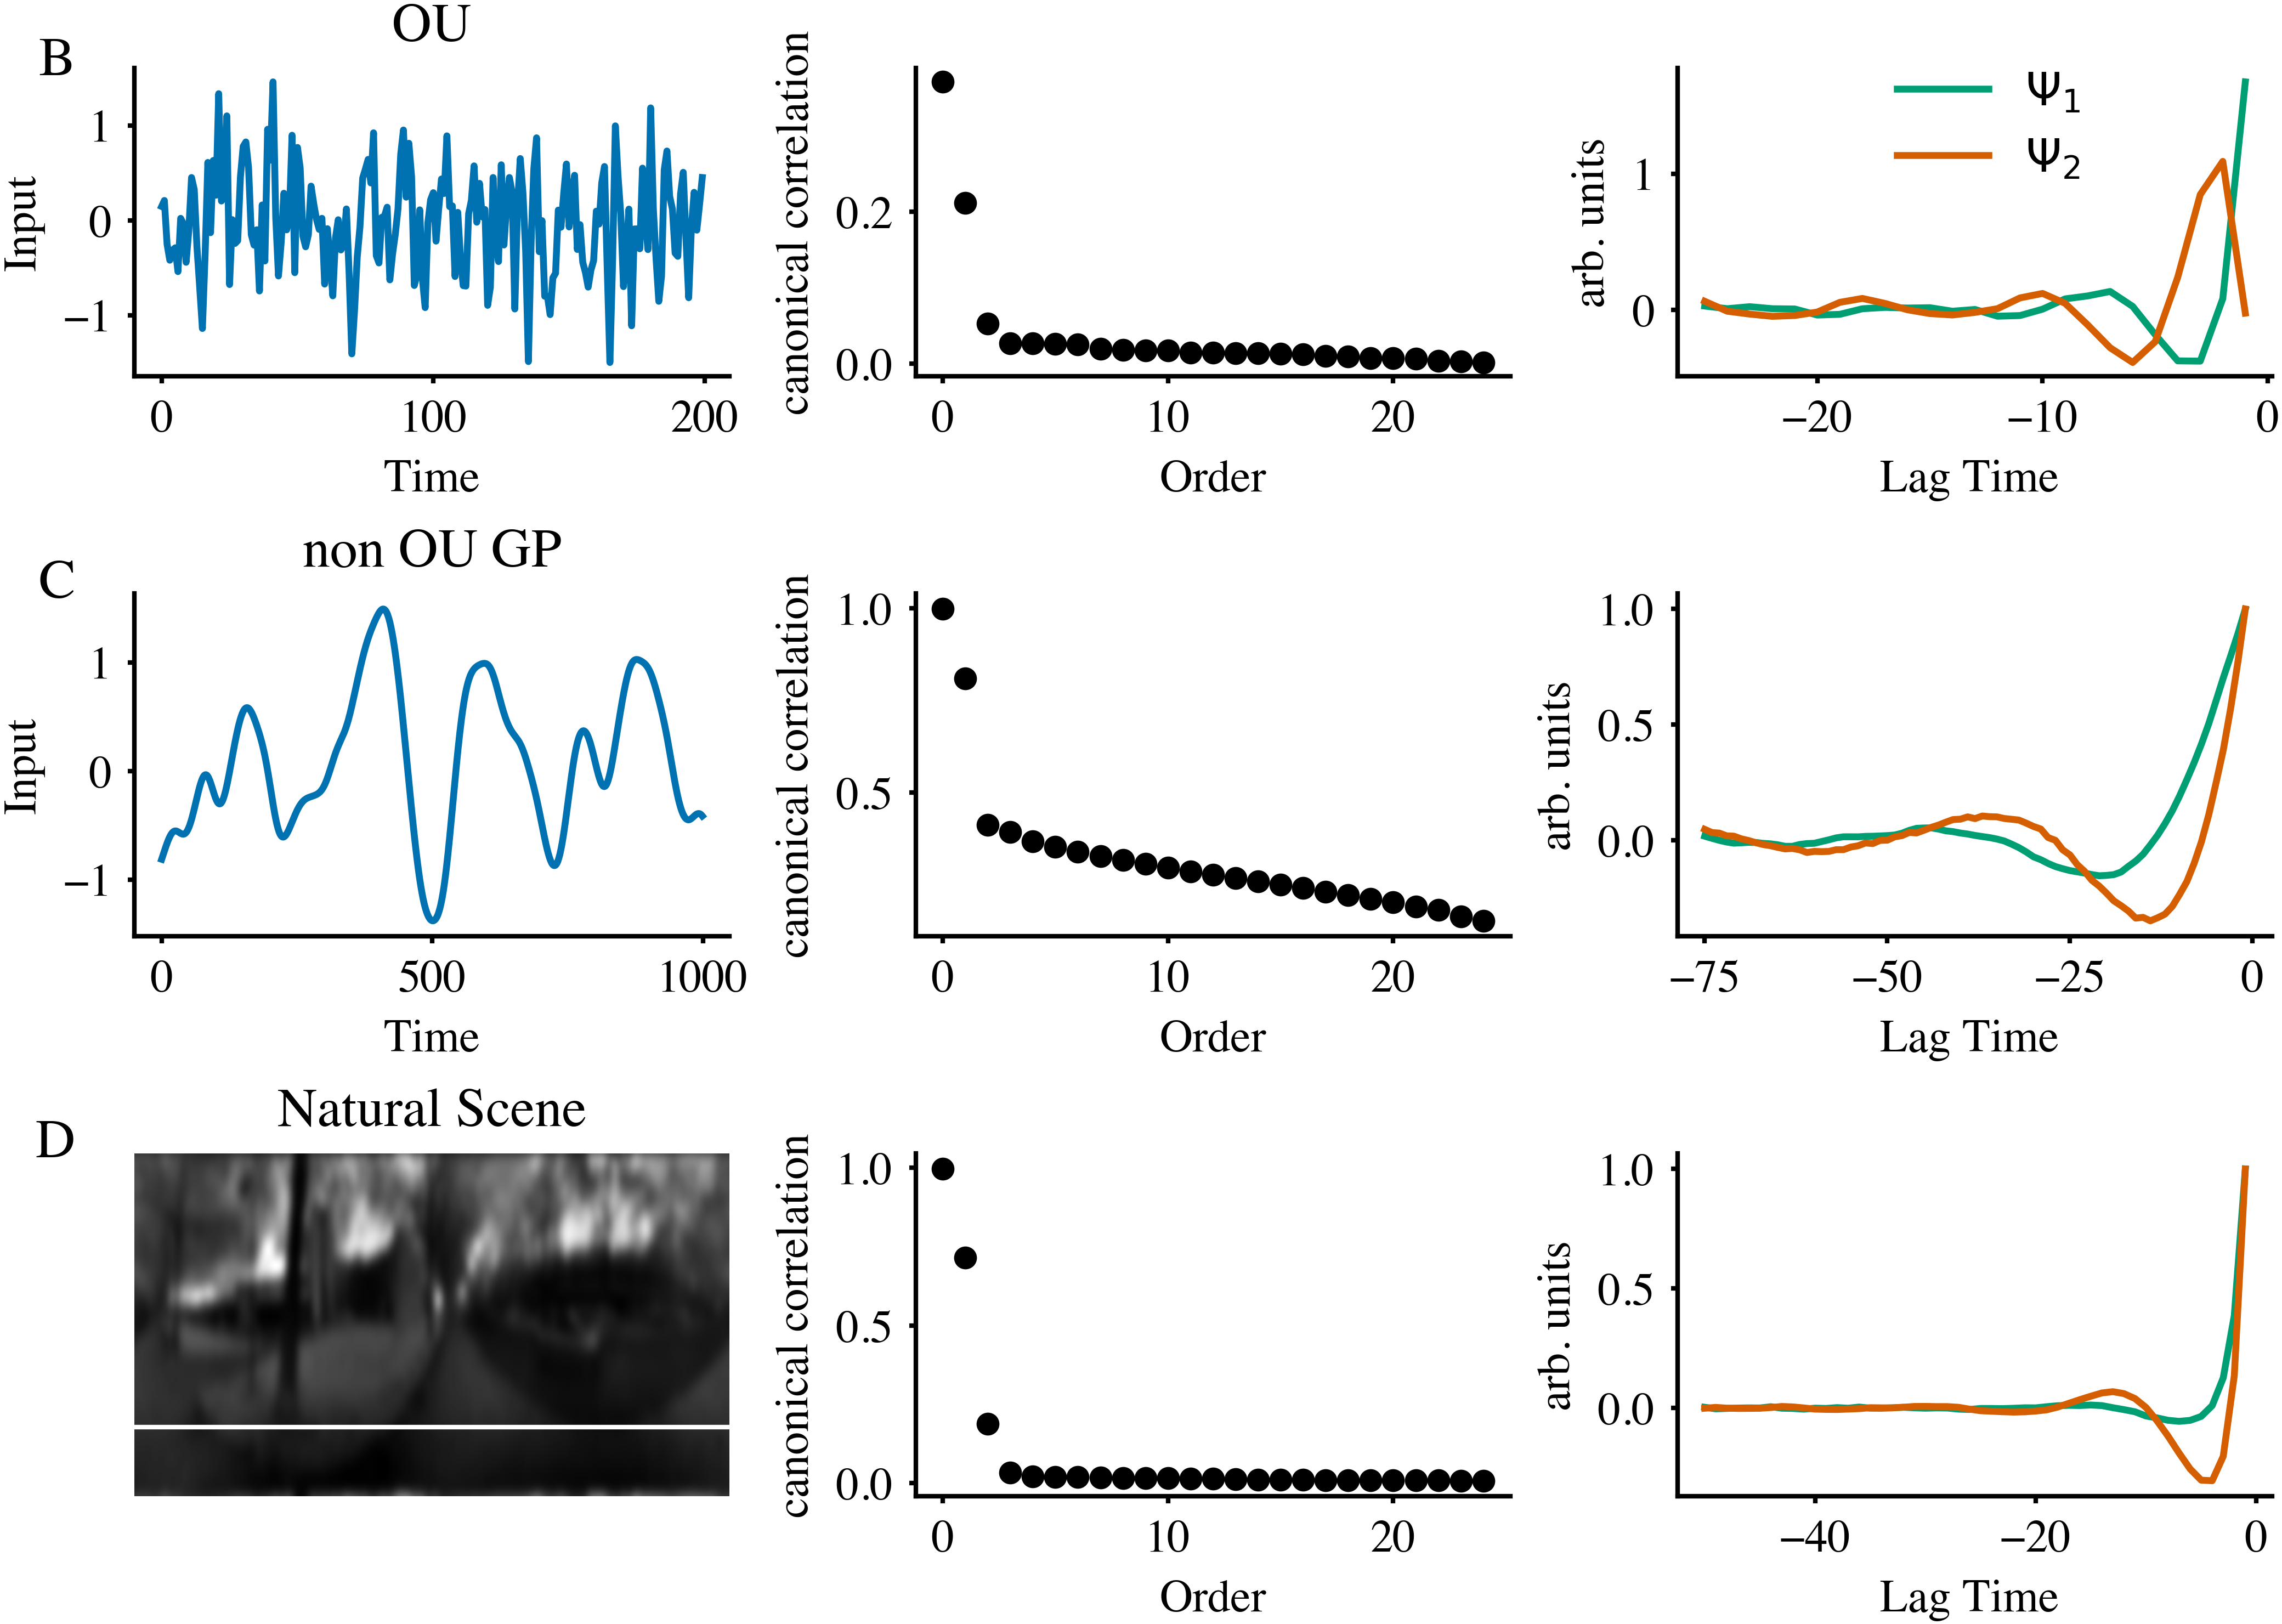

In [15]:
platte = sns.color_palette()
filter_clrs = [platte[2], platte[5]]

# a horizontal layout
fig1 = plt.figure(figsize=(7,5), constrained_layout=True)
widths = [3, 3, 3]
heights = [1.8, 2, 2]
spec5 = fig1.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
# adjust horizontal space between subplots
fig1.subplots_adjust(wspace=0.4)
# adjust vertical space between subplots
fig1.subplots_adjust(hspace=0.7)

## trace, first column
labels = ["B", "C", "D"]
titles = ['OU','non OU GP','Natural Scene']
for i in range(3):
    ax = fig1.add_subplot(spec5[i,0])
    if i == 2:
        ax.imshow(all_examples[i]['trace'].T, cmap="gray",aspect="auto")
        # add a horizontal white line onto the image
        ax.axhline(200, color='white', linewidth=1)
        # remove x and y axis
        ax.axis('off')
    else:
        ax.plot(all_examples[i]['trace'],linewidth=1.5,color=platte[4])
        ax.set_xlabel('Time')
        ax.set_ylabel('Input')
    # add title to each plot
    ax.set_title(titles[i], fontsize=12, fontweight="bold")
    ax.text(
        -0.1, 1.1,  # Position: slightly outside the upper-left corner
        labels[i],
        transform=ax.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    ) 

## singular values
for i in range(3):
    ax = fig1.add_subplot(spec5[i,1])
    ax.plot(all_examples[i]['singular_values'],'o',markersize=4,color='black')
    ax.set_xlabel('Order')
    # add y label as "Canonical Correlation"
    ax.set_ylabel('canonical correlation')


## filters
flt_labels = [rf'$\Psi_1$',rf'$\Psi_2$']
for i in range(3):
    ax = fig1.add_subplot(spec5[i,2])
    L = all_examples[i]['filters'].shape[0]
    tx = np.arange(L) - L
    if i == 0:
        for j in range(all_examples[i]['filters'].shape[1]):
            ax.plot(tx, all_examples[i]['filters'][::-1, j], linewidth=1.5, \
                    color=filter_clrs[j],label = flt_labels[j])
        # ax.plot(tx,all_examples[i]['filters'][::-1,:],linewidth=1.5, label=[rf'$\Psi_1$',rf'$\Psi_2$'])
        ax.legend(
        ncols=1, 
        bbox_to_anchor=(0.3, 0.5), 
        fontsize=10)
    else:
        for j in range(all_examples[i]['filters'].shape[1]):
            ax.plot(tx, all_examples[i]['filters'][::-1, j], linewidth=1.5, color=filter_clrs[j])
    ax.set_xlabel('Lag Time ')
    ax.set_ylabel('arb. units')

# save the figure
# fig1.savefig("./figures/fig1_v4.pdf", dpi=300, bbox_inches="tight")



Text(0, 0.5, 'arb. unit')

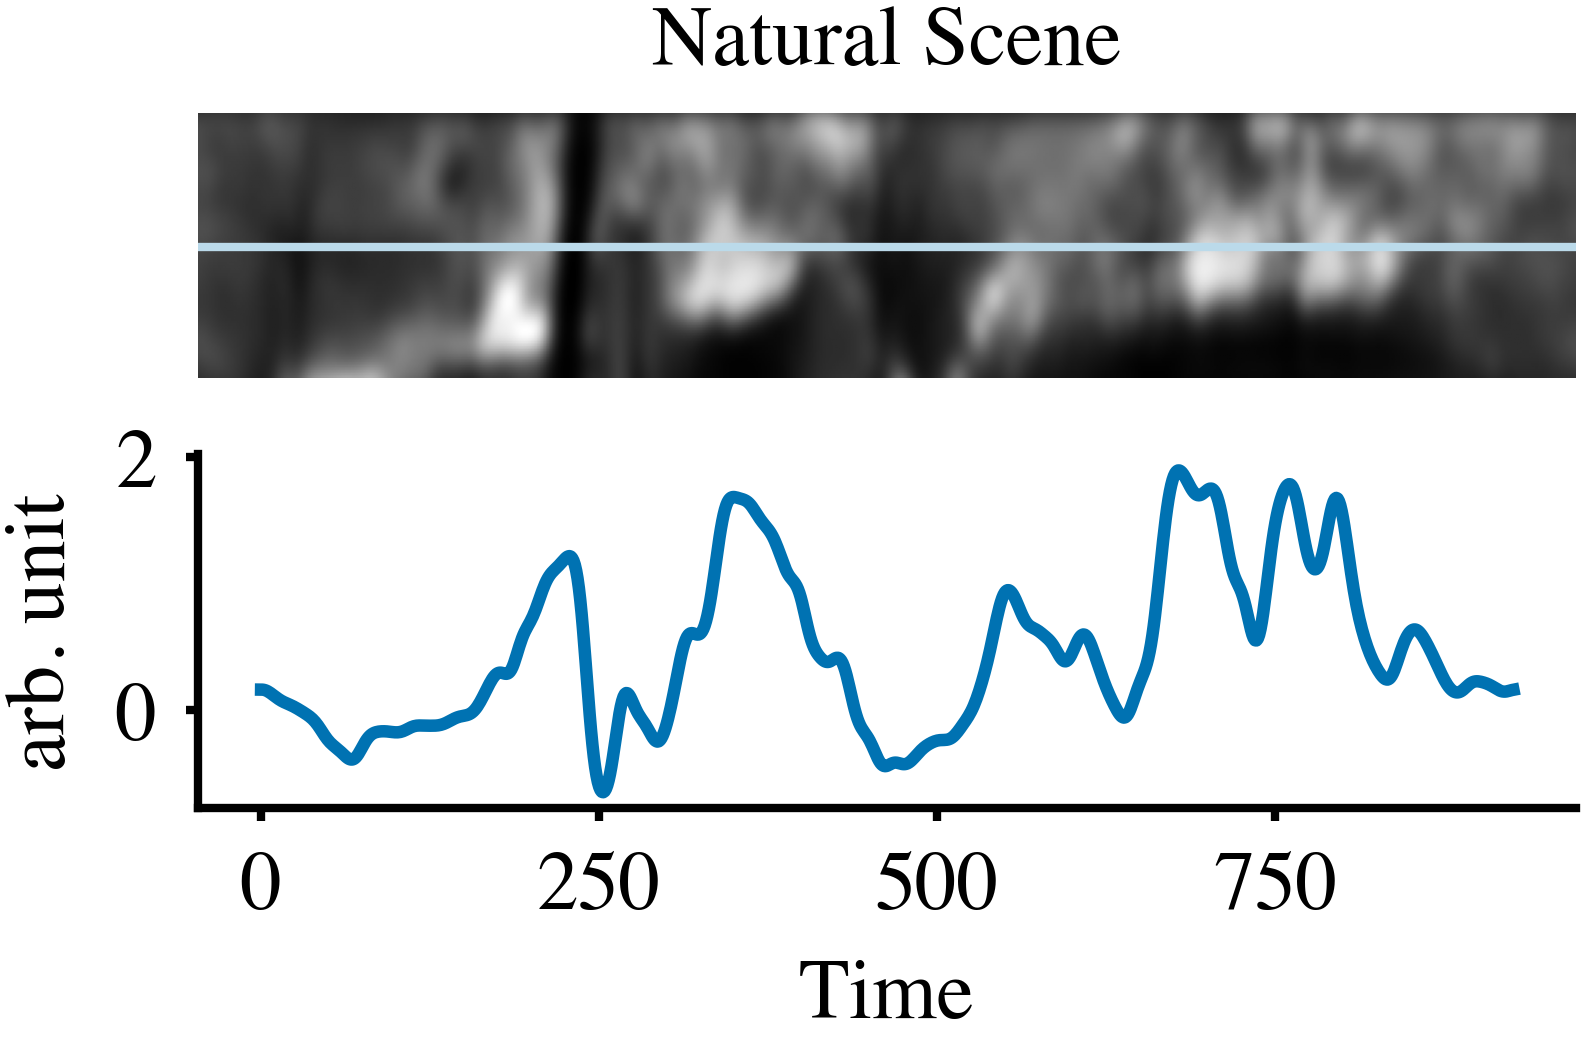

In [16]:
img = all_examples[2]['trace'].T
row_sel = 50
fig1D = plt.figure(figsize=(2.7,1.8), constrained_layout=True)
spec2 = fig1D.add_gridspec(ncols=1, nrows=2, 
                          height_ratios=[1.5,2])
# fig, ax = plt.subplots(2, 1, figsize=(2, 2))  # Create two subplots side by side
# set the height ratio of the subplots
# fig.subplots_adjust(hspace=0.7)
# First subplot: Image
ax0 = fig1D.add_subplot(spec2[0])
ax0.imshow(img[:100,:], cmap="gray", aspect="auto")
# Add a horizontal white line onto the image
ax0.axhline(row_sel, color=RdBu[6], linewidth=1)
# Remove x and y axis
ax0.axis('off')
ax0.set_title('Natural Scene', fontsize=10, fontweight="bold")


# Second subplot: Plot
ax1 = fig1D.add_subplot(spec2[1])
ax1.plot(img[row_sel], linewidth=1.5, color=platte[4])
ax1.set_xlabel('Time')
ax1.set_ylabel('arb. unit')

# save the figure
# fig1D.savefig("./figures/fig1D_natural_scene.pdf", dpi=300, bbox_inches="tight")

## Fig 2 Gaussian process


In [17]:
data = np.load(root + "fig2_cca_filter_sv.npz", allow_pickle=True)
filters = data['filters'].item()  # Convert back to dictionary if needed
sv = data['sv'].item()

In [18]:
noise_sel = [0.01,0.4]
which_filter = 1
singular_values_mean = []
information = []
for noise_level in noise_sel:
    singular_values = np.array(
        np.array(
            [
                singular_values
                for singular_values in sv[noise_level]
            ]
        )
    )
    singular_values_mean.append( singular_values.mean(axis=0))
    information.append( -np.log2(1-singular_values_mean[-1]**2)/2)

In [19]:
def get_mean_filters(filters_dict, which_filter=0):
    filters_mean = []
    filters_std = []
    for k, noise_level in enumerate(filters_dict):
            filter = np.array(
                np.array(
                    [
                        filters[which_filter, :] / np.max(abs(filters[which_filter, :]))*np.sign(filters[which_filter, 0])
                        for filters in filters_dict[noise_level]
                    ]
                )
            )
            filters_mean.append( filter.mean(axis=0))
            filters_std.append( filter.std(axis=0))
    return filters_mean, filters_std


first_mean, first_std = get_mean_filters(filters, which_filter=0)
second_mean, second_std = get_mean_filters(filters, which_filter=1)

Ganglion cell

In [14]:
dfolder = "/Users/shawnqin/Documents/dropbox_simons/Projects/data/ganglion_cell_Gollisch/"
cell64 = dfolder + "mono_biphasic_exp_4_cell_64.txt"
cell12 = dfolder + "bi_triphasic_exp_4_cell_12.txt"
cell30 = dfolder + "mono_biphasic_exp_1_cell_30.txt"
cell14 = dfolder + "mono_biphasic_exp_1_cell_14.txt"

# load all the data and plot a 2 by 2 plot
data = np.loadtxt(cell64)
ts = np.arange(1, 31)/30-1 # lag time, in unit of second
# fig,ax = plt.subplots(figsize=(2,1))

data_cell14 = np.loadtxt(cell14)
cut_time = 15

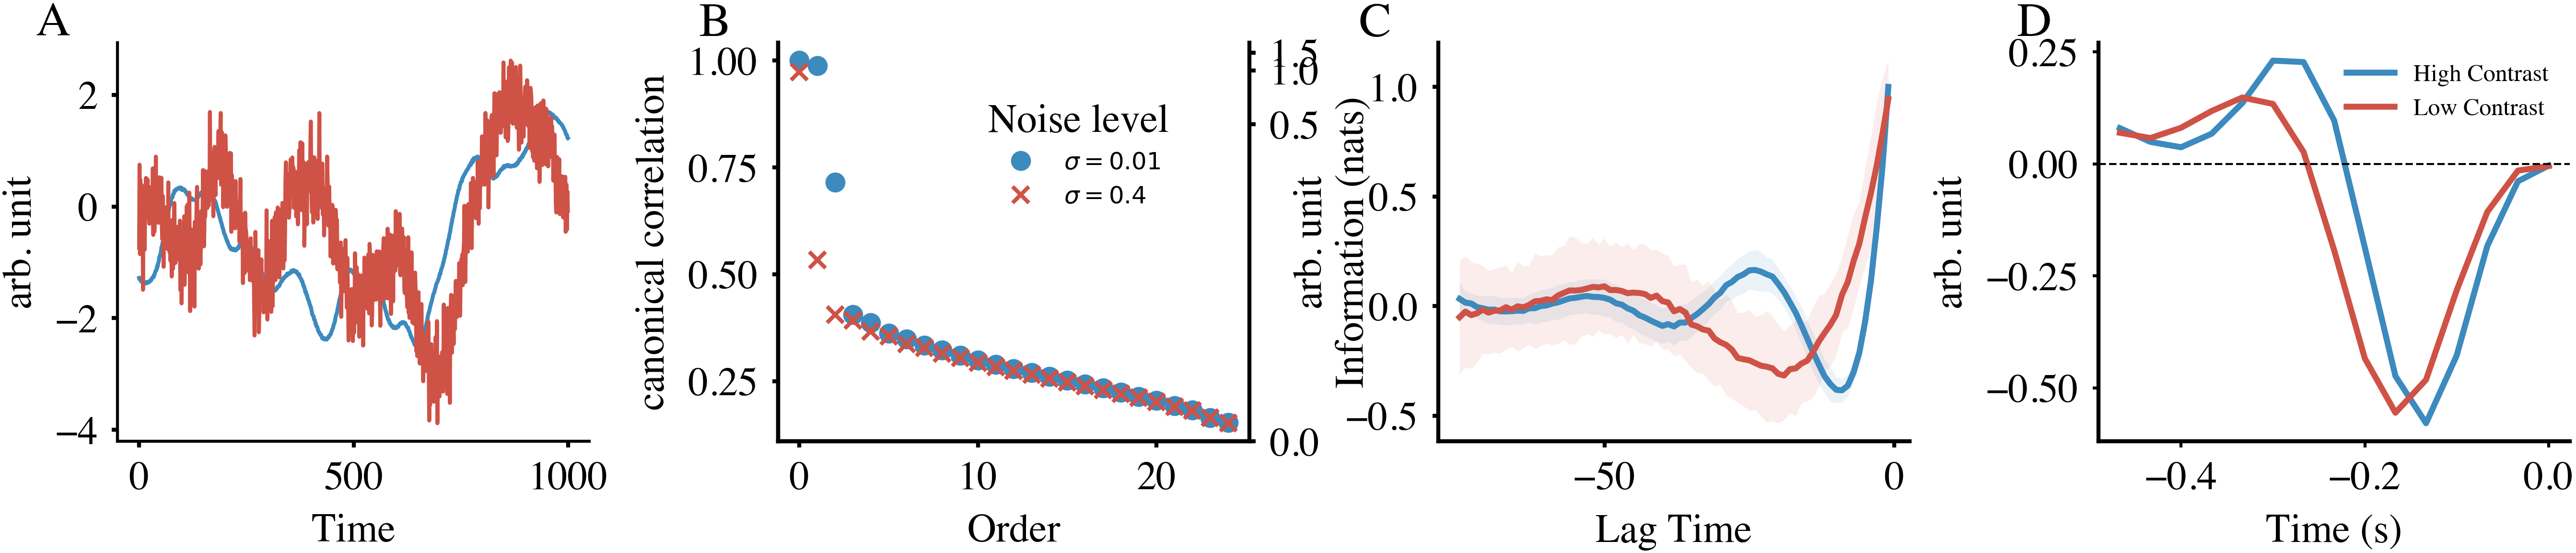

In [15]:
colors = [RdBu[-2], RdBu[1]]
fig,ax = plt.subplots(1,4,figsize=(11,1.8))
# adjust horizontal space between subplots
fig.subplots_adjust(wspace=0.4)
# plot 2 example rq gaussian curve from rq_functions
rq_sel = np.random.randint(0, rq_functions.shape[0], 2)

# define scale transformation, used to show the information
def forward(a):
    return -np.log(1-a**2)/2
def inverse(a):
    return np.sqrt(1-np.exp(-2*a))

noise_levels = [0.01, 0.4]
inx = [0,2]
symbols = ['o','x']
tx = np.arange(len(second_mean[0])) - len(second_mean[0])
for i,noise in enumerate(noise_levels):
    ax[0].plot(rq_functions[rq_sel[i],:] + np.random.normal(0,noise,len(rq_functions[rq_sel[i],:])),\
               linewidth=1,color=colors[i],label=rf"$\sigma = {noise_levels[i]}$")
    ax[1].plot(singular_values_mean[i],symbols[i],markersize=4,color=colors[i],label=rf"$\sigma = {noise_levels[i]}$")
    ax[2].plot(tx,second_mean[inx[i]][::-1],linewidth=1.5,color=colors[i],\
               label=rf"$\sigma = {noise_levels[i]}$")
    ax[2].fill_between(tx, second_mean[inx[i]][::-1] -second_std[inx[i]][::-1],\
                       second_mean[inx[i]][::-1] + second_std[inx[i]][::-1], \
                        color = colors[i], alpha=0.1, lw=0)
    ax[3].plot(ts[cut_time:],data_cell14[1-i,cut_time:].T,linewidth=1.5,color = colors[i])
ax[0].set_xlabel("Time")
ax[0].set_ylabel('arb. unit')

# plot the canonical correlation coefficients and the corresponding mutual information
# set the x and y label
ax[1].set_xlabel("Order")
ax[1].set_ylabel("canonical correlation")
# add a plot share the same x but different y axis
ax_twin = ax[1].twinx()
x_info = np.arange(0,2,0.5)
y_info = np.sqrt(1-np.exp(-2*x_info))
#transform 

# set the twin y axis ticks 
ax_twin.set_yticks(y_info,x_info)
# ax_twin.plot(information,'^',color='red',markersize=4)
# set the y label of the twin axis
ax_twin.set_ylabel("Information (nats)")
ax_twin.spines['right'].set_visible(True)  # Ensure it's visible
# ax_twin.set_yscale('function', functions=(forward, inverse))


# show the legend, only the mean
ax[1].legend(ncols=1, bbox_to_anchor=(0.4, 0.9), title="Noise level")
# add x axis label
ax[2].set_xlabel("Lag Time")
ax[2].set_ylabel("arb. unit")

# ganglion cells
ax[3].legend(['High Contrast','Low Contrast'])
ax[3].axhline(0, color='black', linestyle='--', linewidth=0.5)
ax[3].set_xlabel('Time (s)')
for spine in ax[0].spines.values():
    spine.set_linewidth(0.75)
# also set the xticks line width
# set the width of the ticks using tick_params
ax[3].tick_params(axis='x', width=0.75)
ax[3].tick_params(axis='y', width=0.75)
ax[3].set_ylabel("arb. unit")

# Add subplot labels
labels = ["A", "B", "C", "D"]
for i, axis in enumerate(ax):
    axis.text(
        -0.1, 1.1,  # Position: slightly outside the upper-left corner
        labels[i],
        transform=axis.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )
# how can I increase gap between B and C

# save as a pdf
# fig.savefig("./figures/fig2_v4.pdf", dpi=300, bbox_inches="tight")
    

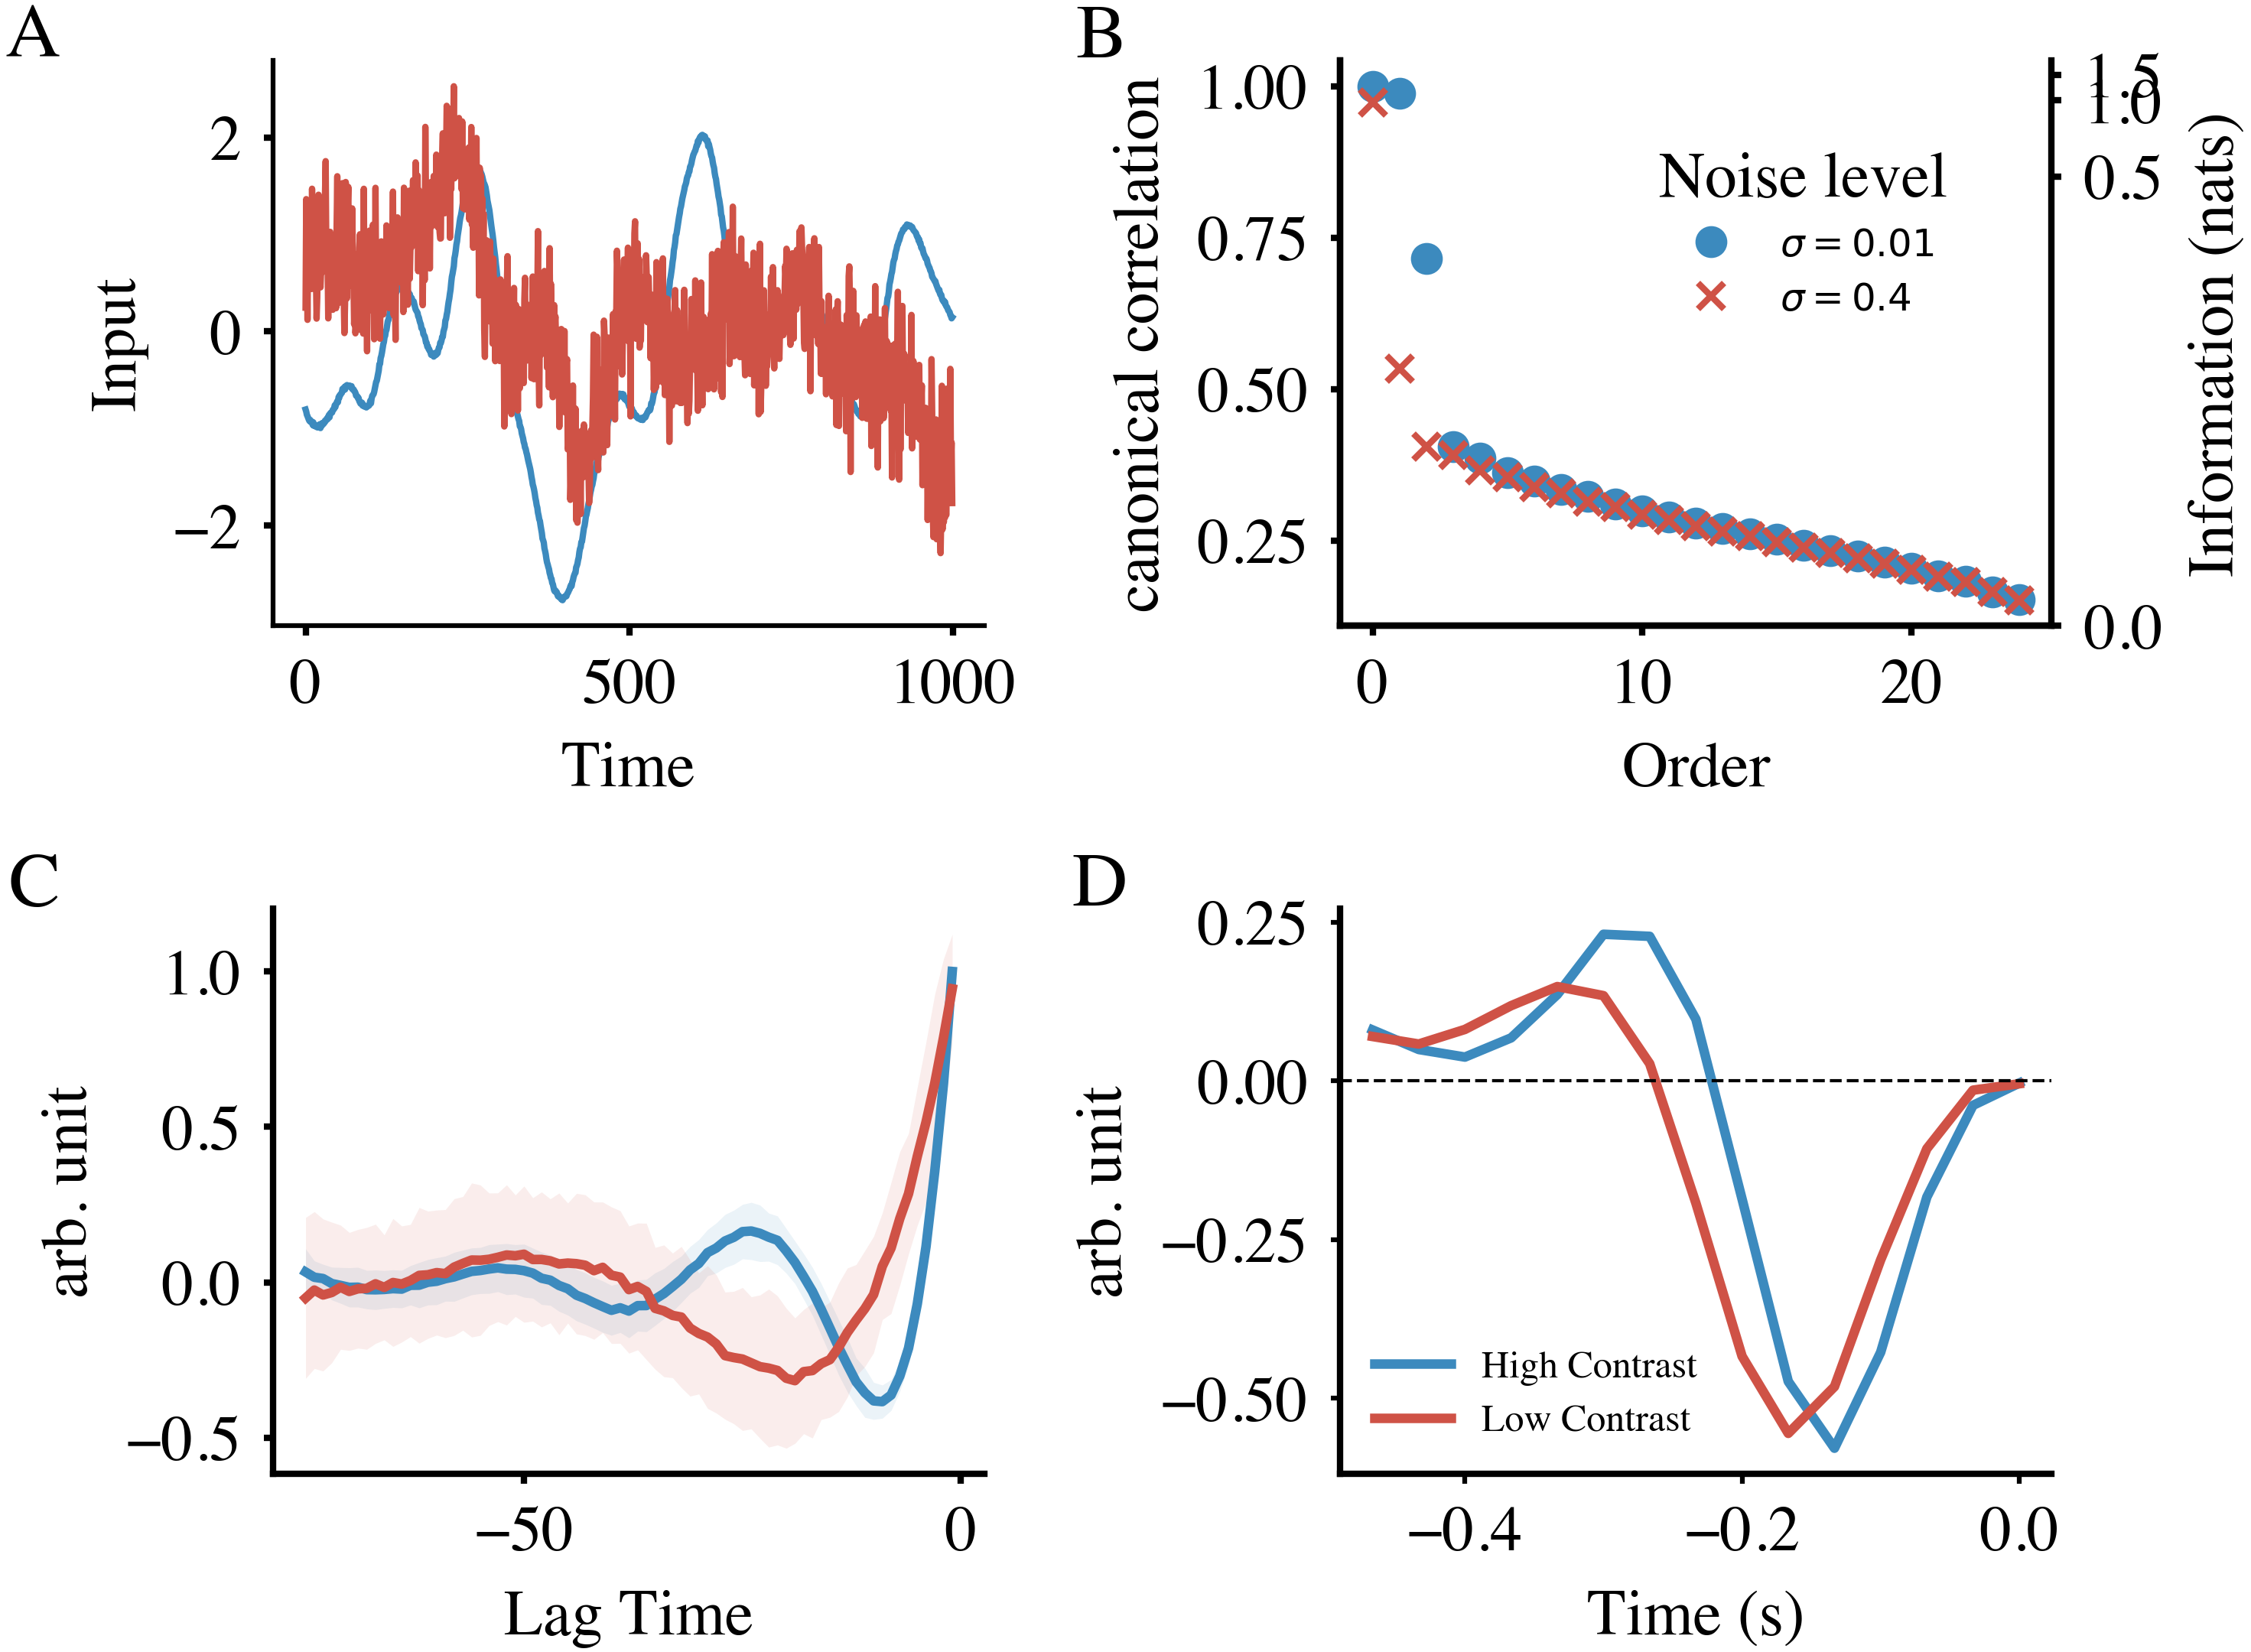

In [16]:
# a 2 x 2 layout
colors = [RdBu[-2], RdBu[1]]
fig,ax = plt.subplots(2,2,figsize=(5,4))
# adjust horizontal space between subplots
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.5 )
# plot 2 example rq gaussian curve from rq_functions
rq_sel = np.random.randint(0, rq_functions.shape[0], 2)

# define scale transformation, used to show the information
def forward(a):
    return -np.log(1-a**2)/2
def inverse(a):
    return np.sqrt(1-np.exp(-2*a))

noise_levels = [0.01, 0.4]
inx = [0,2]
symbols = ['o','x']
tx = np.arange(len(second_mean[0])) - len(second_mean[0])
for i,noise in enumerate(noise_levels):
    ax[0,0].plot(rq_functions[rq_sel[i],:] + np.random.normal(0,noise,len(rq_functions[rq_sel[i],:])),\
               linewidth=1,color=colors[i],label=rf"$\sigma = {noise_levels[i]}$")
    ax[0,1].plot(singular_values_mean[i],symbols[i],markersize=4,color=colors[i],label=rf"$\sigma = {noise_levels[i]}$")
    ax[1,0].plot(tx,second_mean[inx[i]][::-1],linewidth=1.5,color=colors[i],\
               label=rf"$\sigma = {noise_levels[i]}$")
    ax[1,0].fill_between(tx, second_mean[inx[i]][::-1] -second_std[inx[i]][::-1],\
                       second_mean[inx[i]][::-1] + second_std[inx[i]][::-1], \
                        color = colors[i], alpha=0.1, lw=0)
    ax[1,1].plot(ts[cut_time:],data_cell14[1-i,cut_time:].T,linewidth=1.5,color = colors[i])
ax[0,0].set_xlabel("Time")
ax[0,0].set_ylabel('Input')

# plot the canonical correlation coefficients and the corresponding mutual information
# set the x and y label
ax[0,1].set_xlabel("Order")
ax[0,1].set_ylabel("canonical correlation")
# add a plot share the same x but different y axis
ax_twin = ax[0,1].twinx()
x_info = np.arange(0,2,0.5)
y_info = np.sqrt(1-np.exp(-2*x_info))
#transform 

# set the twin y axis ticks 
ax_twin.set_yticks(y_info,x_info)
ax_twin.set_ylabel("Information (nats)")
ax_twin.spines['right'].set_visible(True)  # Ensure it's visible
# ax_twin.set_yscale('function', functions=(forward, inverse))


# show the legend, only the mean
ax[0,1].legend(ncols=1, bbox_to_anchor=(0.4, 0.9), title="Noise level")
# add x axis label
ax[1,0].set_xlabel("Lag Time")
ax[1,0].set_ylabel("arb. unit")

# ganglion cells
ax[1,1].legend(['High Contrast','Low Contrast'])
ax[1,1].axhline(0, color='black', linestyle='--', linewidth=0.5)
ax[1,1].set_xlabel('Time (s)')
for spine in ax[0,0].spines.values():
    spine.set_linewidth(0.75)
# also set the xticks line width
# set the width of the ticks using tick_params
ax[1,1].tick_params(axis='x', width=0.75)
ax[1,1].tick_params(axis='y', width=0.75)
ax[1,1].set_ylabel("arb. unit")

# Add subplot labels
labels = ["A", "B", "C", "D"]
for i, axis in enumerate(ax.flatten()):
    axis.text(
        -0.3, 1.1,  # Position: slightly outside the upper-left corner
        labels[i],
        transform=axis.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )
# how can I increase gap between B and C

# save as a pdf
# fig.savefig("./figures/fig2_v4.pdf", dpi=300, bbox_inches="tight")
    

## Fig 3 Compare filters with experiments

The Gaussian rational quadratidc kernel data give better fit to the experimental data compared with the natural scence. Natural scene gives qualitative similar result as that of the experiment. In the main text figure 3, we used the natural scene data. We report the Gaussian process data in the supplementary material. We show the similarity between experiment and the model side by side.
- the action of the first 2 filters resemble that of L3 and L1 data
- the noie dependent or adaptation of filter.

First, the theoretical filters from Gaussian process

In [17]:
# load the step data
test_file = root + "fig3_test_traj_step.npz"
test_data = np.load(test_file, allow_pickle=True)
# average responses
mean_action1 = np.mean(test_data['cca_flt_action1'], axis=1)
mean_action2 = np.mean(test_data['cca_flt_action2'], axis=1)
mean_action2.shape
noise_level = [0.01,0.1,0.4]

theory_lmc = [mean_action2[2], mean_action2[0],-mean_action1[2]]

Text(0, 0.5, 'Luminance')

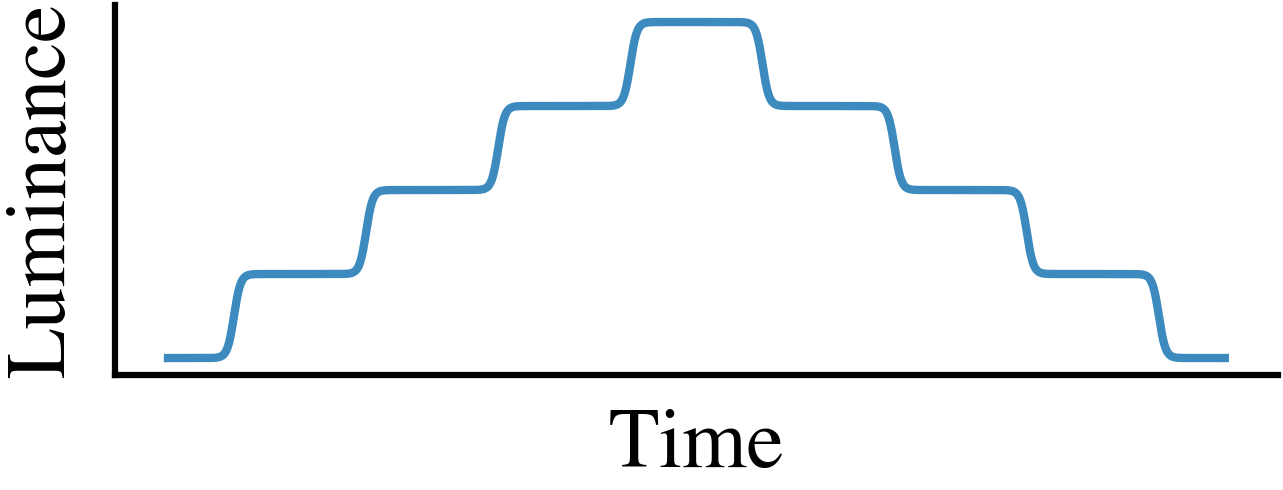

In [18]:
# plt.plot(test_data['test_traj'])

fig,ax = plt.subplots(figsize=(2.5,0.8))
plt.plot(test_data['test_traj'], color=RdBu[-2])
# remove x axis and ticks
# ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
# remove y ticks
ax.set_yticks([])
# the axsis width
for spine in ax.spines.values():
    spine.set_linewidth(0.75)
# add x and y label
ax.set_xlabel('Time')
ax.set_ylabel('Luminance')
# save the figure as a pdf
# fig.savefig("./figures/fig3_test_traj.pdf", dpi=300, bbox_inches="tight")

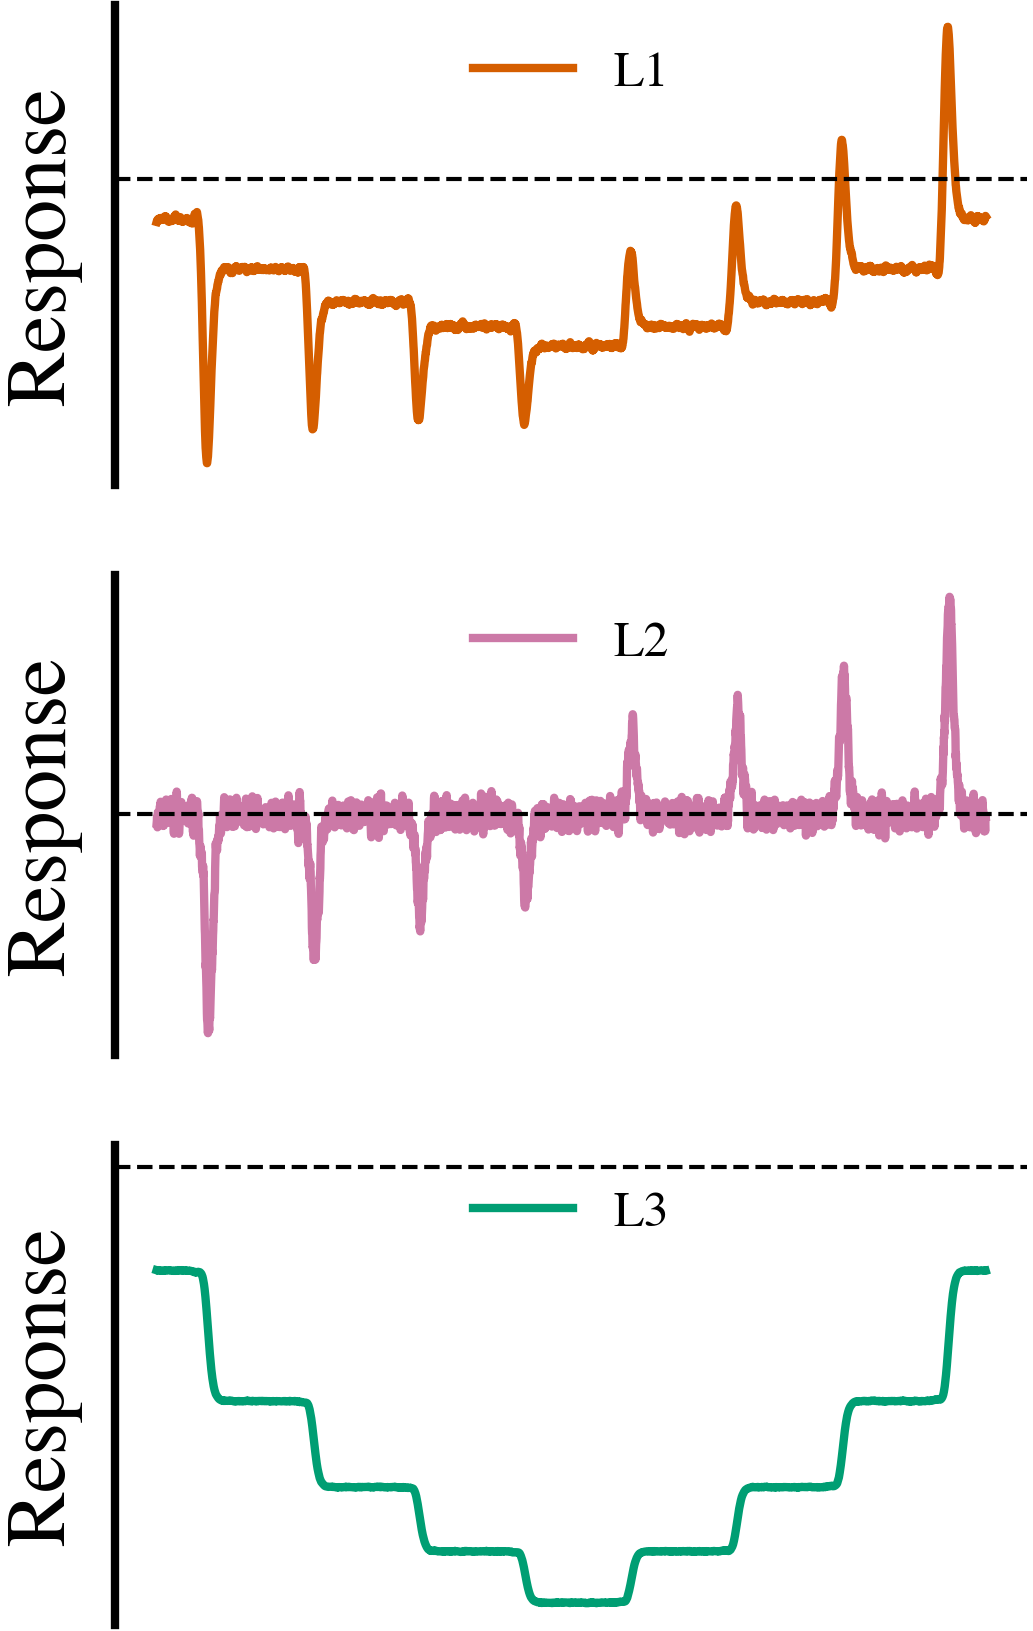

In [19]:
platte = sns.color_palette()
inx = [5,7,2]
# make 3 by 1 plots of the average responese with shared x axis
fig, axs = plt.subplots(3, 1, sharex=True, sharey=False,figsize=(2,3))
for i, theory in enumerate(theory_lmc):
    axs[i].plot(theory, color=platte[inx[i]],label='L' + str(i+1))
    # add horizontal dashed line at 0
    axs[i].axhline(0, color='black', linestyle='--', linewidth=0.5)
    # axs[i].set_title('L' + str(i+1))
    # axs[i].set_ylabel('Average Response')
    # remove x axis and ticks
    # show the legend
    axs[i].legend(loc='upper center')
    axs[i].spines['bottom'].set_visible(False)
    axs[i].set_xticks([])
    # remove y ticks
    axs[i].set_yticks([])
    axs[i].set_ylabel('Response')
# tight layout
plt.tight_layout()

Now, show the action of filters obtained from natural scence.

In [20]:

with open('./results/fig3_natural_scence_filters.pkl', 'rb') as f:
    filter_1st_mean = pickle.load(f)
    filter_1st_std = pickle.load(f)
    filter_2nd_mean = pickle.load(f)
    filter_2nd_std = pickle.load(f)
    proj_L1 = pickle.load(f)
    proj_L2 = pickle.load(f)
    proj_L3 = pickle.load(f)
    test_traj = pickle.load(f)
    test_traj_noise = pickle.load(f)
noise_level = [0.005,0.05,0.5]

theory_lmc = [proj_L1, proj_L2,-proj_L3]

Now, the experimental filters obtained via calcium images

In [21]:

# load the eLife L1 - L3 data
dfolder = '/Users/shawnqin/Documents/dropbox_simons/Projects/data/Ketkar2022_elife/Fig2/data/'
L1_data = sio.loadmat(dfolder + 'L1_staircaseStim.mat')
L2_data = sio.loadmat(dfolder + 'L2_staircaseStim.mat')
L3_data = sio.loadmat(dfolder + 'L3_staircaseStim.mat')
lmc = [d['data']['responses'][0][0] for d in [L1_data, L2_data, L3_data]]
# average response and std
cell_types = ['L1', 'L2', 'L3']
ave_resp = {type:[] for type in cell_types}
std_resp = {type:[] for type in cell_types}
for i, type in enumerate(cell_types):
    ave_resp[type].append(np.mean(lmc[i], axis=0))
    std_resp[type].append(np.std(lmc[i], axis=0))
# convert to numpy array
ave_resp = {type:np.array(ave_resp[type]) for type in cell_types}
std_resp = {type:np.array(std_resp[type]) for type in cell_types}

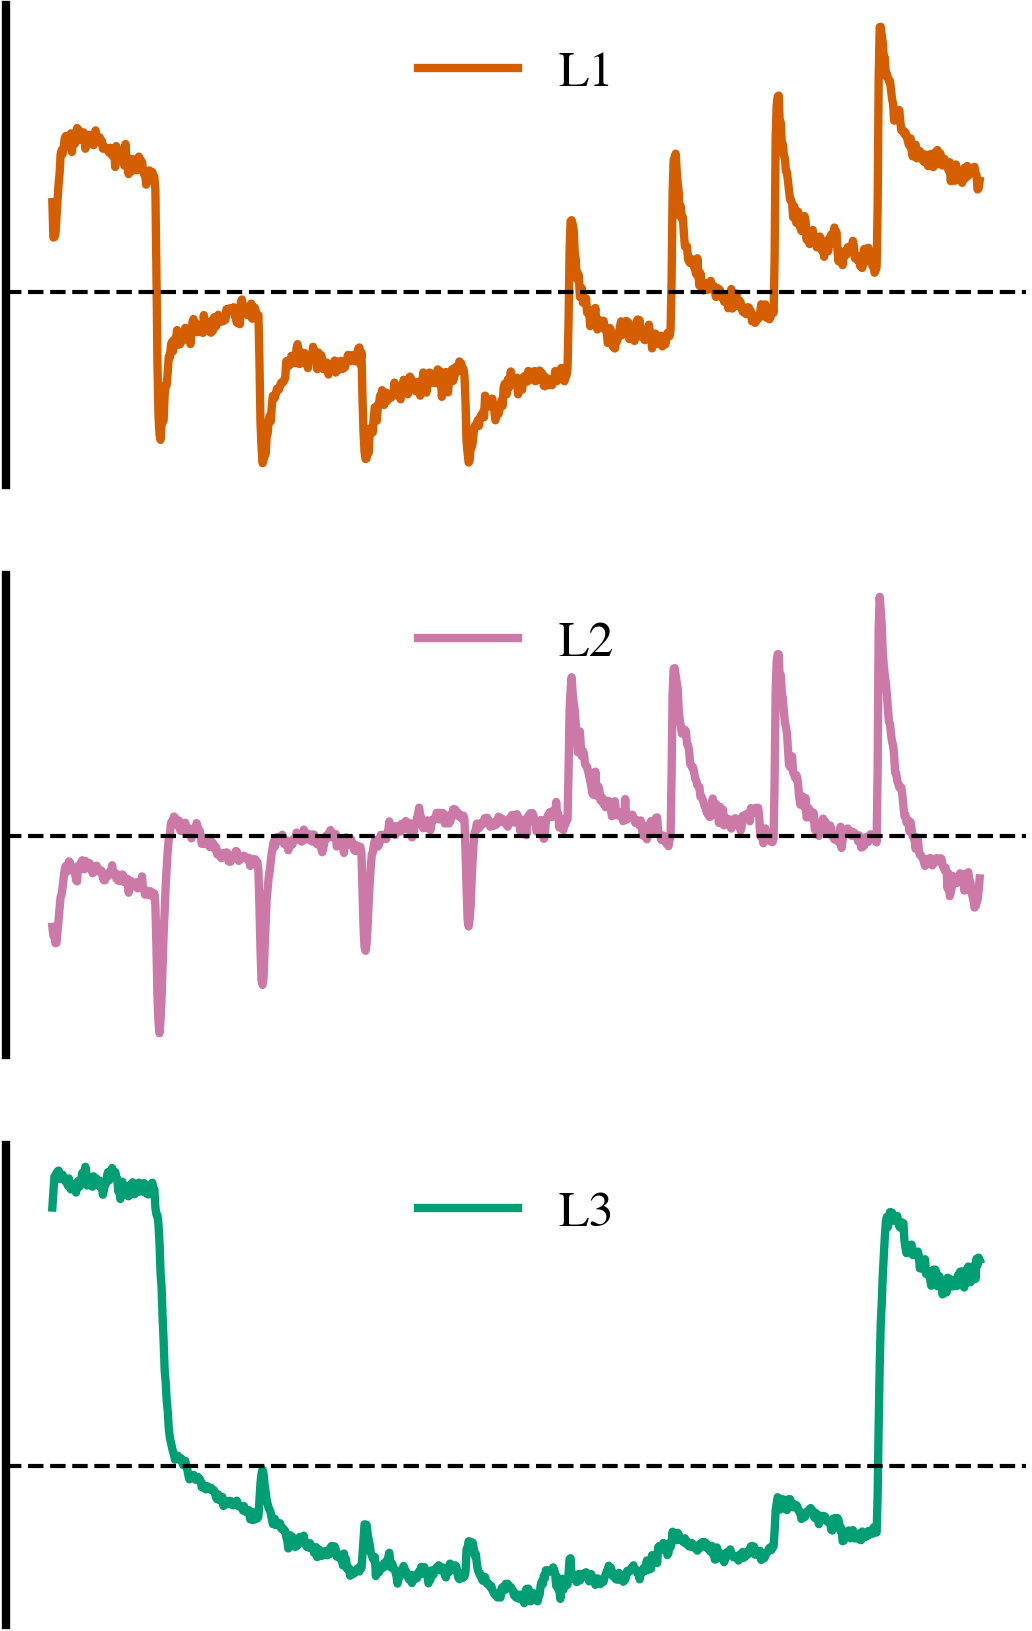

In [22]:
# plot the mean a
platte = sns.color_palette()
inx = [5,7,2]
# make 3 by 1 plots of the average responese with shared x axis
fig, axs = plt.subplots(3, 1, sharex=True, sharey=False,figsize=(2,3))
for i, type in enumerate(cell_types):
    axs[i].plot(ave_resp[type].T, color=platte[inx[i]],label='L' + str(i+1))
    # add horizontal dashed line at 0
    axs[i].axhline(0, color='black', linestyle='--', linewidth=0.5)
    # axs[i].set_title('L' + str(i+1))
    # axs[i].set_ylabel('Average Response')
    # remove x axis and ticks
    # show the legend
    axs[i].legend(loc='upper center')
    axs[i].spines['bottom'].set_visible(False)
    axs[i].set_xticks([])
    # remove y ticks
    axs[i].set_yticks([])
# tight layout
plt.tight_layout()
# save as pdf
# plt.savefig('./figures/fig3a_experiment.pdf')

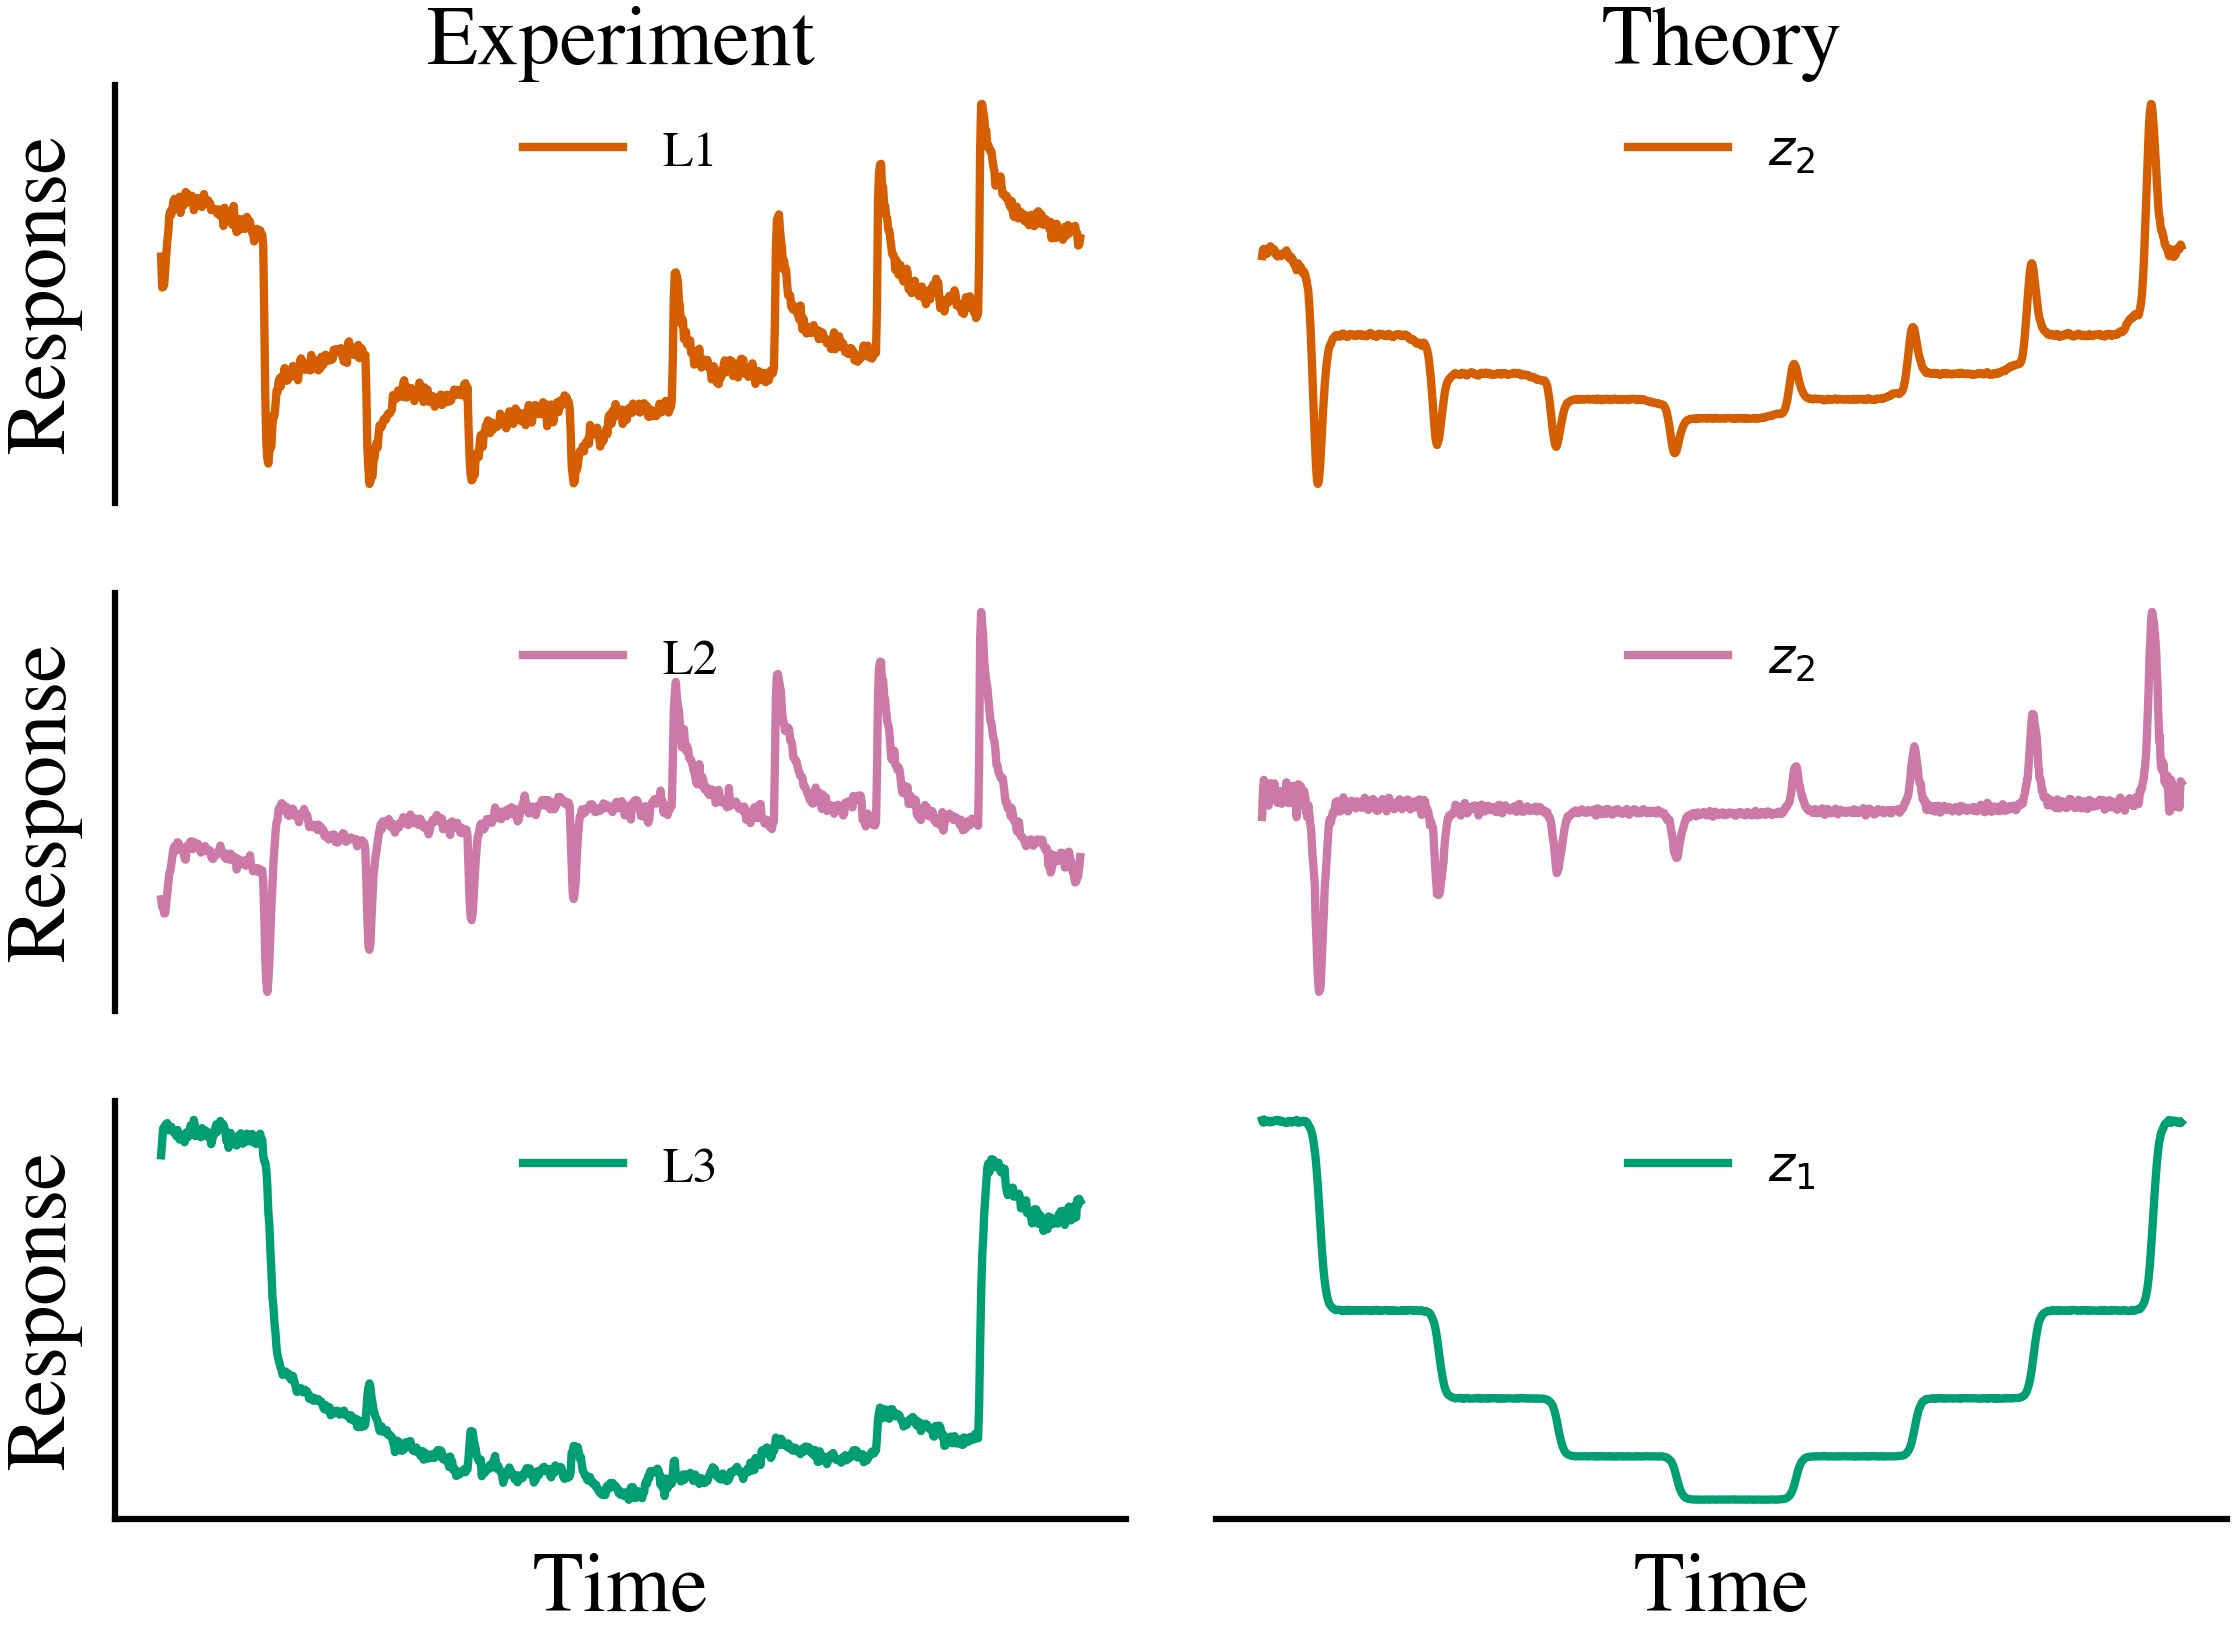

In [23]:
# Create the figure and axes
flt_labels = [rf'$z_2$',rf'$z_2$',rf'$z_1$']
fig, axs = plt.subplots(3, 2, figsize=(4, 3), sharey=False)

# Make the first column share the same x-axis
for i in range(1, 3):  # Rows 1 and 2 share x-axis with row 0
    axs[i, 0].sharex(axs[0, 0])

# Make the second column share the same x-axis
for i in range(1, 3):  # Rows 1 and 2 share x-axis with row 0
    axs[i, 1].sharex(axs[0, 1])

# Plot the data
for i, type in enumerate(cell_types):
    axs[i, 0].plot(ave_resp[type].T, color=platte[inx[i]], label='L' + str(i + 1))
    # axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=0.5)
    axs[i, 0].legend(loc='upper center')
    if i != 2:
        axs[i, 0].spines['bottom'].set_visible(False)
    # now remove y axis
    # axs[i, 0].spines['left'].set_visible(False)
    axs[i, 0].set_xticks([])
    axs[i, 0].set_yticks([])
    axs[i, 0].set_ylabel('Response')

    axs[i, 1].plot(theory_lmc[i], color=platte[inx[i]], label=flt_labels[i])
    axs[i, 1].legend(loc='upper center')
    if i != 2:
        axs[i, 1].spines['bottom'].set_visible(False)
    axs[i, 1].spines['left'].set_visible(False)
    axs[i, 1].set_xticks([])
    axs[i, 1].set_yticks([])
axs[-1,0].set_xlabel('Time')
axs[-1,1].set_xlabel('Time')
# add text "Experiment" and "Theory" at the top of the figure
axs[0, 0].text(0.5, 1.1, 'Experiment', ha='center', va='center', transform=axs[0, 0].transAxes)
axs[0, 1].text(0.5, 1.1, 'Theory', ha='center', va='center', transform=axs[0, 1].transAxes)

# adjust the axsis width
for ax in axs.flat:
    ax.spines['left'].set_linewidth(0.75)
    # ax.spines['right'].set_linewidth(0.5)
    # ax.spines['top'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.75)
# Adjust layout
plt.tight_layout()
# save the figure as a pdf
# plt.savefig('./figures/fig3_v5.pdf')
plt.show()

## Fig 4 Motion detection
We compare the two-layer ReSU trained from natural images and that of the fly's motion detection pathway.

In [27]:
dfile = "./results/fig3_preferred_null_response.npz"
# load the data
data = np.load(dfile)
preferred_resp = data['preferred_resp']
null_resp = data['null_resp']
test_traj = data['test_traj']
weights = data['filter_2nd_layer'][1,:]
weights_sel = weights

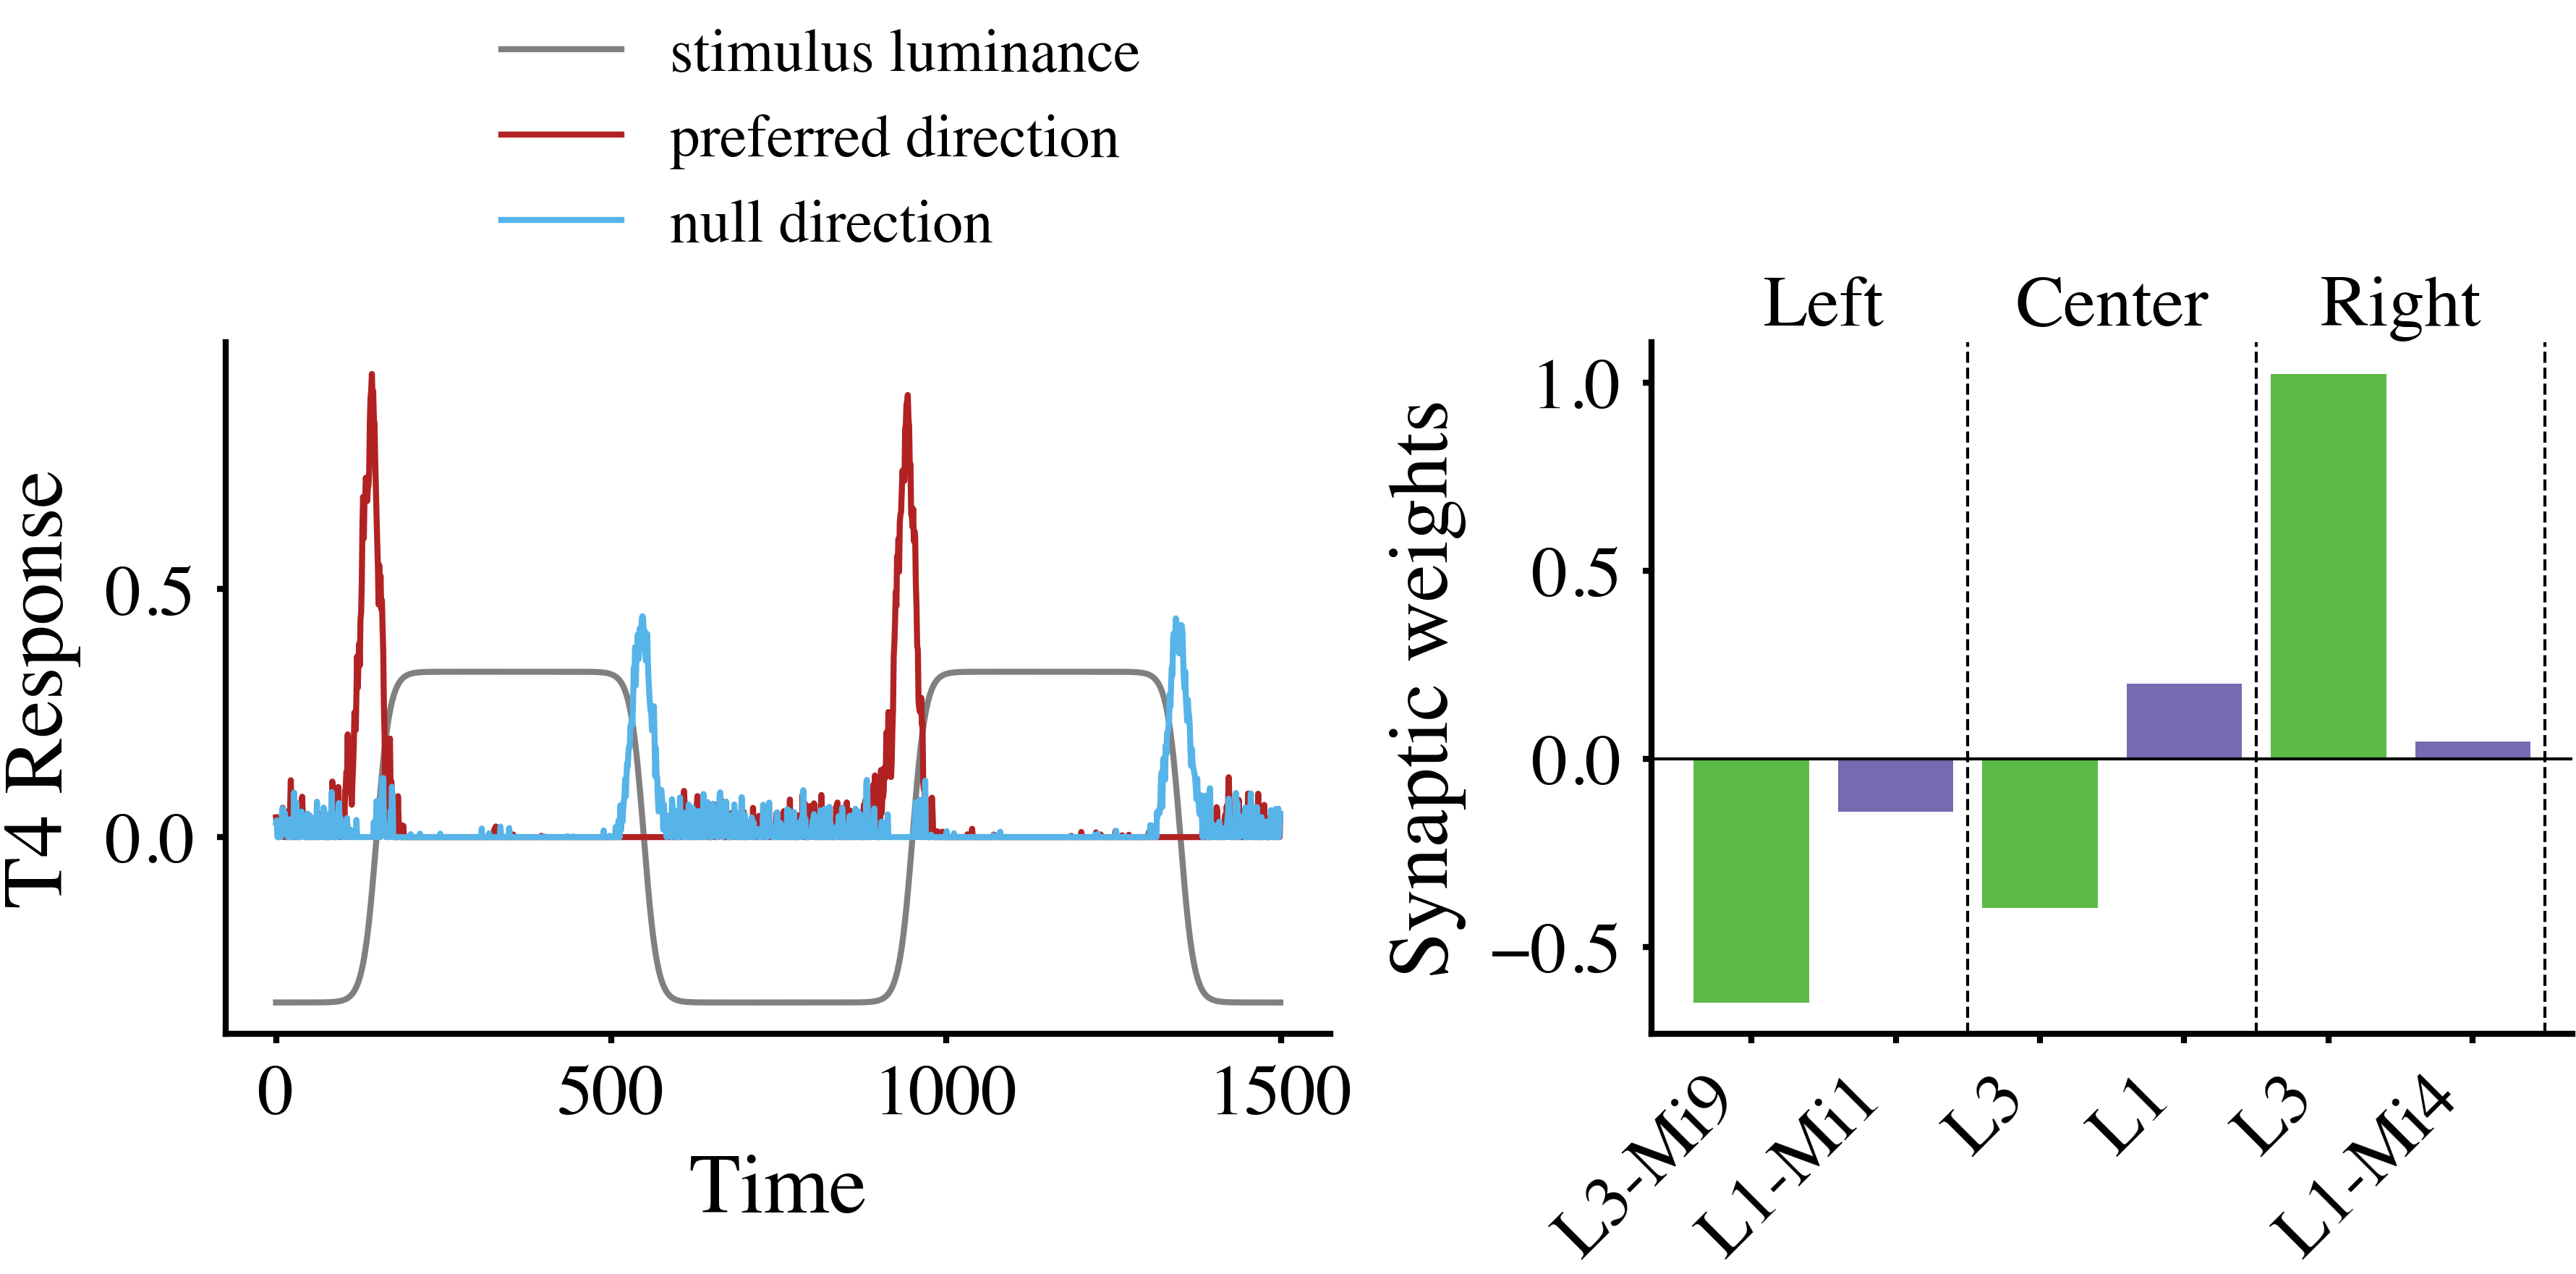

In [28]:
widths = [1.2,1]
horizon = 50
gs_kw = dict(width_ratios=widths)
fig4, f4_axes = plt.subplots(figsize=(6,3),ncols=2, nrows=1, constrained_layout=True,
                             gridspec_kw=gs_kw)

fig.subplots_adjust(wspace=0.5)
plot_len = 1500

f4_axes[0].plot(test_traj[horizon:plot_len+horizon]/3, linewidth=1, color='gray', label='stimulus luminance')
f4_axes[0].plot(preferred_resp[:plot_len], linewidth=1, label='preferred direction')
f4_axes[0].plot(null_resp[:plot_len], linewidth=1, label='null direction')

# ax[0].axhline(0, color='black', linestyle='--', linewidth=0.5)
# ax[0].set_title('Test Trajectory')
f4_axes[0].set_xlabel('Time', fontsize=14)
f4_axes[0].set_ylabel('T4 Response', fontsize=14)
f4_axes[0].tick_params(axis='x', labelsize=12)
f4_axes[0].tick_params(axis='y', labelsize=12)
# show the legends
f4_axes[0].legend(
    ncols=1, 
    bbox_to_anchor=(0.2, 1.05), 
    fontsize=10
)
# f4_axes[0].legend(loc='upper right', fontsize=8)

# plot the weights, using bar plot
cell_labels = ['Left','Center','Right']
labels_loc_x = [0.5,2.5,4.5]
labels_loc_y = [1.2,1.2,1.2]
vertical_line_loc = [1.5,3.5,5.5]
mycolors = ['#5cba48','#766ab0','#5cba48','#766ab0','#5cba48','#766ab0']
x_tick_labels = ['L3-Mi9', 'L1-Mi1', 'L3', 'L1', 'L3','L1-Mi4']
f4_axes[1].bar(np.arange(len(weights_sel)), weights_sel, color=mycolors)
# add vertical dashed line at x = [1.5,3.5,5.5]
for i in range(len(vertical_line_loc)):
    f4_axes[1].axvline(vertical_line_loc[i], color='black', linestyle='--', linewidth=0.5)
    f4_axes[1].text(labels_loc_x[i], labels_loc_y[i], cell_labels[i], ha='center', va='center', fontsize=12)
f4_axes[1].axhline(0, color='black', linestyle='-', linewidth=0.5)
# set the x tick labels
f4_axes[1].set_xticks(np.arange(len(weights_sel)))
f4_axes[1].set_xticklabels(x_tick_labels, rotation=45, ha='right', fontsize=12)
# ax[1].set_xlabel('Neuron Index')
f4_axes[1].set_ylabel('Synaptic weights', fontsize=14)
# x ticks font
f4_axes[1].tick_params(axis='x', labelsize=12)
f4_axes[1].tick_params(axis='y', labelsize=12)

# save figure as a pdf
# plt.savefig('./figures/fig4_preferred_null_response_rectify.pdf')


## Experimental connectomic data
The experimental data is from Mitya.

In [29]:
# specify the colors
colors = sns.color_palette('tab20')
color_L3 = colors[4:6]
color_L1 = colors[-3:]


exp_L1 = np.array([0.37, 1.37, 0.34])
# normalzie the weights by thir sum of absolute value
exp_L1 = exp_L1/np.sum(np.abs(exp_L1))
exp_L3 = np.array([0.20, -0.38, -0.09])
exp_L3 = exp_L3/np.sum(np.abs(exp_L3))

# theory L1 and L3
theory_L1 = weights[[5,3,1]]
# normalize the weights by their sum of absolute value
theory_L1 = theory_L1/np.sum(np.abs(theory_L1))
theory_L3 = weights[[4,2,0]]
# normalize the weights by their sum of absolute value
theory_L3 = theory_L3/np.sum(np.abs(theory_L3))

In [30]:
# # import matplotlib.pyplot as plt
# # import numpy as np

# # Data vectors
# # theory = [0.12019636, 0.51544649, -0.36435715]
# # experiment = [0.49451992, -0.19216837, -0.31331172]

# # Data vectors
# theory = theory_L3
# experiment = exp_L3
# # Labels for the bars
# # labels = ['L1_Mi4','L1', 'L1_Mi1']
# # labels = [r'$L1-Mi4$', r'$L1$', r'$L1-Mi1$']
# labels = ['left', 'center', 'right']

# # Create the figure and axes
# fig, ax = plt.subplots(figsize=(2.5, 1.8))

# # Bar width
# bar_width = 0.3

# # Positions of the bars
# x = np.arange(len(labels))

# # Plot the bars
# bars1 = ax.bar(x - bar_width/2, theory, bar_width, label='theory', color=colors[4])
# bars2 = ax.bar(x + bar_width/2, experiment, bar_width, label='experiment', color=colors[5])

# # add vertical dashed line at x = 1.5, 3.5, 5.5
# # ax.axvline(1.5*bar_width, color='black', linestyle='--', linewidth=0.5)
# # ax.axvline(3.5*bar_width, color='black', linestyle='--', linewidth=0.5)
# # ax.axvline(5.5*bar_width, color='black', linestyle='--', linewidth=0.5)
# # add text at the top of the bar, 'Front', 'Center', 'Back'
# # ax.text(0.5, 1.2, 'Front', ha='center', va='center', fontsize=12)
# # ax.text(2.5, 1.2, 'Center', ha='center', va='center', fontsize=12)
# # ax.text(4.5, 1.2, 'Back', ha='center', va='center', fontsize=12)
# # Add labels, title, and legend
# # ax.set_xlabel('Features')
# ax.set_ylabel('Relative weight')
# # ax.set_title('Much Comparison, Very Data, Wow')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()
# # set title
# ax.set_title('L3', fontsize=12, fontweight="bold")

# # Add "doge" annotations
# # for bar in bars1:
# #     height = bar.get_height()
# #     ax.text(bar.get_x() + bar.get_width()/2, height, 'wow', ha='center', va='bottom', fontsize=10, color='brown')

# # for bar in bars2:
# #     height = bar.get_height()
# #     ax.text(bar.get_x() + bar.get_width()/2, height, 'such data', ha='center', va='bottom', fontsize=10, color='brown')

# # Show the plot
# plt.tight_layout()
# # plt.show()
# # save as pdf
# # plt.savefig('./figures/fig4_weights_comparison_L3.pdf', dpi=300, bbox_inches="tight")

In [31]:
# # import matplotlib.pyplot as plt
# # import numpy as np

# # Data vectors
# # theory = [0.12019636, 0.51544649, -0.36435715]
# # experiment = [0.49451992, -0.19216837, -0.31331172]

# # Data vectors
# theory = theory_L1
# experiment = exp_L1
# # Labels for the bars
# labels = ['left','center', 'right']
# # labels = [r'$L1-Mi4$', r'$L1$', r'$L1-Mi1$']
# # labels = ['L3', 'L3', 'L3_Mi9']

# # Create the figure and axes
# fig, ax = plt.subplots(figsize=(2.5, 1.8))

# # Bar width
# bar_width = 0.3

# # Positions of the bars
# x = np.arange(len(labels))

# # Plot the bars
# bars1 = ax.bar(x - bar_width/2, theory, bar_width, label='theory', color=colors[8])
# bars2 = ax.bar(x + bar_width/2, experiment, bar_width, label='experiment', color=colors[9])

# # Add labels, title, and legend
# # ax.set_xlabel('Features')
# ax.set_ylabel('Relative weight')
# # ax.set_title('Much Comparison, Very Data, Wow')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()
# # add figure title
# ax.set_title('L1', fontsize=12, fontweight='bold')

# # Add "doge" annotations
# # for bar in bars1:
# #     height = bar.get_height()
# #     ax.text(bar.get_x() + bar.get_width()/2, height, 'wow', ha='center', va='bottom', fontsize=10, color='brown')

# # for bar in bars2:
# #     height = bar.get_height()
# #     ax.text(bar.get_x() + bar.get_width()/2, height, 'such data', ha='center', va='bottom', fontsize=10, color='brown')

# # Show the plot
# plt.tight_layout()
# # plt.show()
# # save as pdf
# # plt.savefig('./figures/fig4_weights_comparison_L1.pdf', dpi=300, bbox_inches="tight")

Text(0.5, 1.0, 'L1')

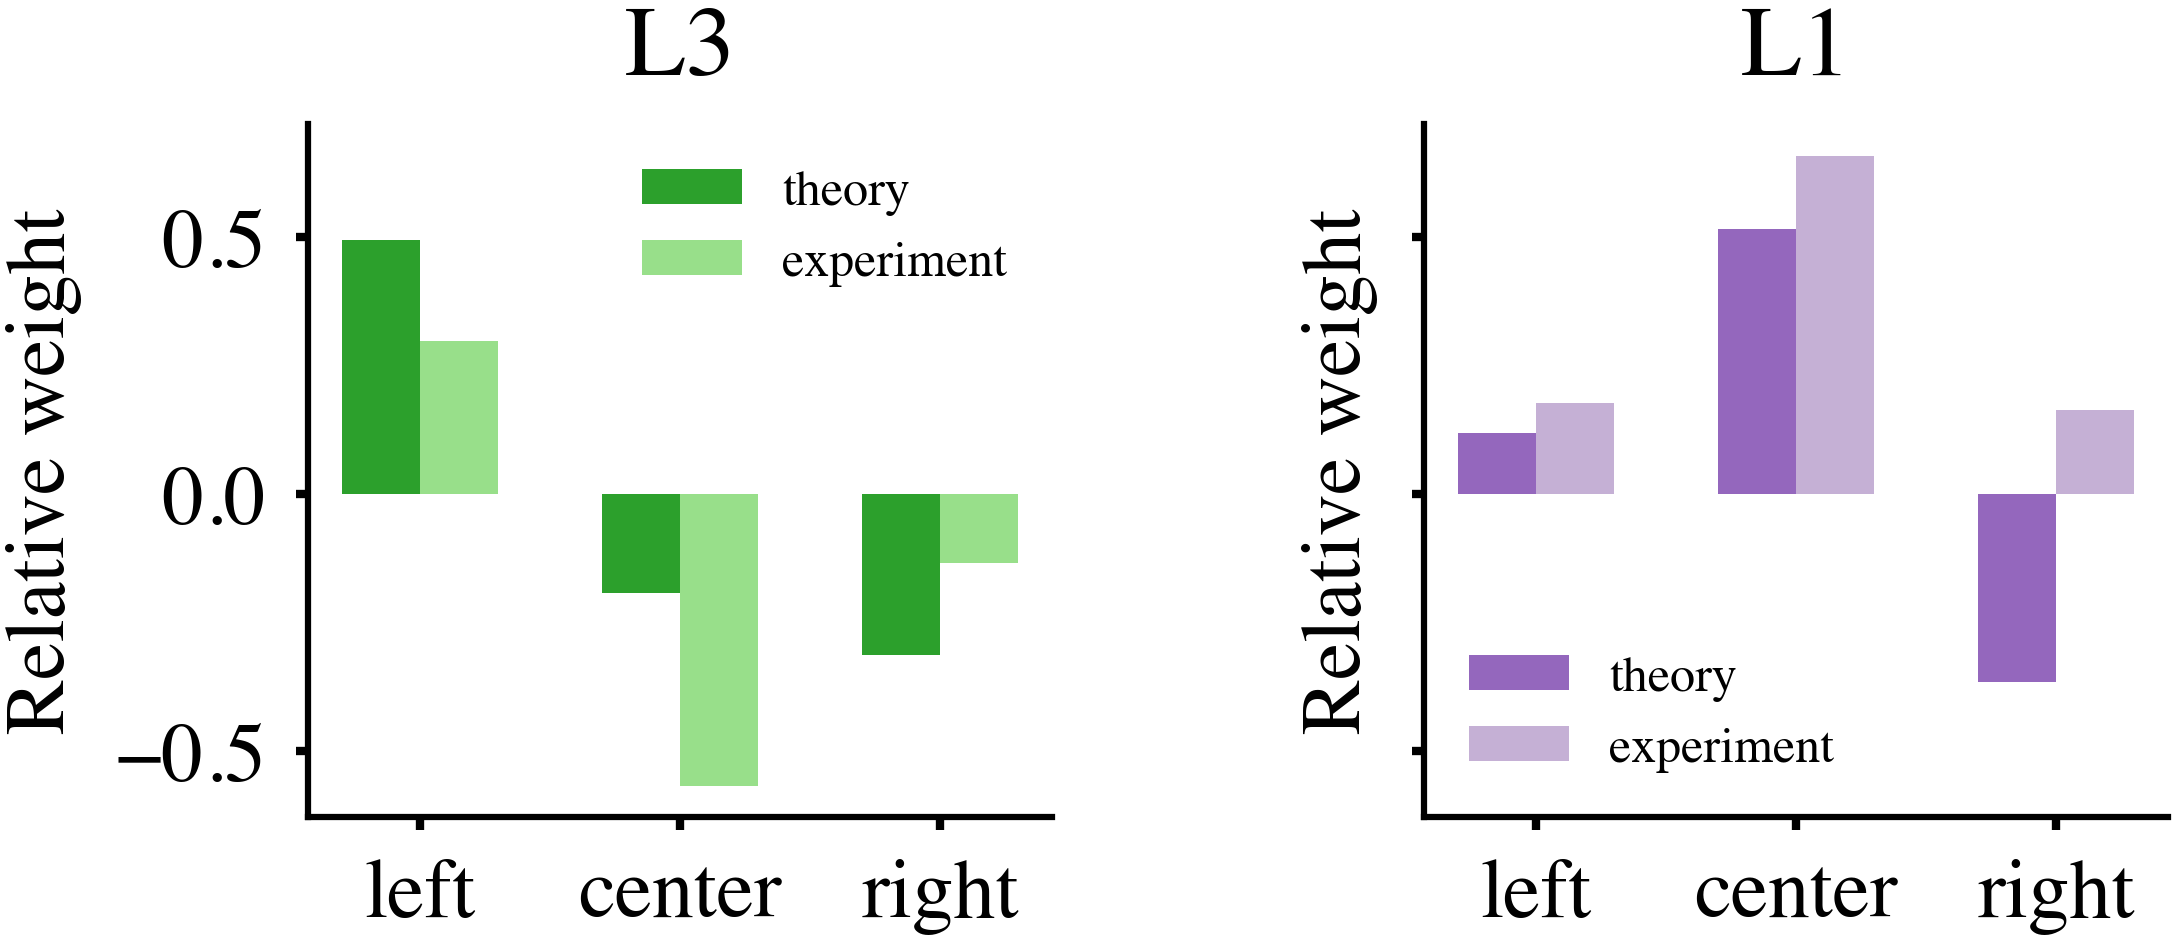

In [35]:
# # Bar width
bar_width = 0.3
labels = ['left','center', 'right']


# # Positions of the bars
x = np.arange(len(labels))
# compare the above tow plots to make 1 by 2
fig, axs = plt.subplots(1, 2, figsize=(4, 1.5), sharey=True)
# adjust the horizontal space between subplots
fig.subplots_adjust(wspace=0.5)
# plot the data
axs[0].bar(x - bar_width/2, theory_L3, bar_width, label='theory', color=colors[4])
axs[0].bar(x + bar_width/2, exp_L3, bar_width, label='experiment', color=colors[5])
axs[0].set_ylabel('Relative weight')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()
axs[0].set_title('L3')
axs[1].bar(x - bar_width/2, theory_L1, bar_width, label='theory', color=colors[8])
axs[1].bar(x + bar_width/2, exp_L1, bar_width, label='experiment', color=colors[9])
axs[1].set_ylabel('Relative weight')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
# change the axis thickness
for ax in axs.flat:
    ax.spines['left'].set_linewidth(0.75)
    # ax.spines['right'].set_linewidth(0.5)
    # ax.spines['top'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.75)

axs[1].legend()
axs[1].set_title('L1')
# save as pdf
# plt.savefig('./figures/fig4_weights_comparison_L1_L3.pdf', dpi=300, bbox_inches="tight")
